In [6]:
# TASK 1: Implement a KNN Classification  [30 Minutes]
#
# Dataset: "seeds_dataset.txt"
#
# Task to carry out: Consider the wheat dataset that comprises data about kernels 
# belonging to three different varieties of wheat: Kama, Rosa,  and Canadian. 
# For each wheat variety, with a random sample of 70 elements, high-quality 
# visualization of  the internal kernel structure was detected using a soft 
# X-ray technique. Seven geometric parameters of wheat  kernels were 
# measured. Use these measurements to classify the wheat variety. Notice 
# the column of this dataset are as follows: = ['a', 'p', 'compactness', 
# 'length', 'width', 'coeff', 'length_g', 'type']

In [7]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.model_selection import train_test_split  # For splitting the dataset

# Load the dataset into a pandas DataFrame
colnames=['a', 'p', 'compactness', 'length', 'width', 'coeff', 'length_g', 'type'] 
df = pd.read_csv("seeds_dataset.txt", names=colnames, delimiter="\t")

kama = 1
rosa = 2
canadian = 3

# print (df)

In [8]:
# Split the dataset into training and test sets, selecting 'compactness', 'length', and 'width'
# as features and 'type' as the target variable. 70% of data is used for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(df[['compactness','length','width']], df['type'], test_size=.3)

In [9]:
# Initialize the KNeighborsClassifier with 3 neighbors, then fit it to the training data
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Use the trained classifier to make predictions on the test set
prediction = classifier.predict(X_test)

In [11]:
# Calculate the number of correct predictions by comparing them to the true test labels
correct = np.where(prediction==y_test, 1, 0).sum()
print(correct)

54


In [12]:
# Calculate the accuracy of the model as the fraction of correct predictions over total predictions
accuracy = correct / len(y_test)
print(accuracy)

0.8571428571428571


In [13]:
# Initialize an empty list to store results of model accuracy for different values of k
results = []

k= 1  Accuracy= 0.8412698412698413
k= 3  Accuracy= 0.8571428571428571
k= 5  Accuracy= 0.8412698412698413
k= 7  Accuracy= 0.8571428571428571
k= 9  Accuracy= 0.8888888888888888
k= 11  Accuracy= 0.8888888888888888
k= 13  Accuracy= 0.8888888888888888
k= 15  Accuracy= 0.8888888888888888
k= 17  Accuracy= 0.8888888888888888
k= 19  Accuracy= 0.8888888888888888
k= 21  Accuracy= 0.873015873015873
k= 23  Accuracy= 0.8888888888888888
k= 25  Accuracy= 0.9047619047619048
k= 27  Accuracy= 0.9047619047619048
k= 29  Accuracy= 0.9047619047619048
k= 31  Accuracy= 0.9047619047619048
k= 33  Accuracy= 0.9047619047619048
k= 35  Accuracy= 0.9047619047619048
k= 37  Accuracy= 0.8888888888888888
k= 39  Accuracy= 0.9047619047619048
k= 41  Accuracy= 0.9047619047619048
k= 43  Accuracy= 0.9047619047619048
k= 45  Accuracy= 0.9047619047619048
k= 47  Accuracy= 0.9047619047619048
k= 49  Accuracy= 0.9047619047619048


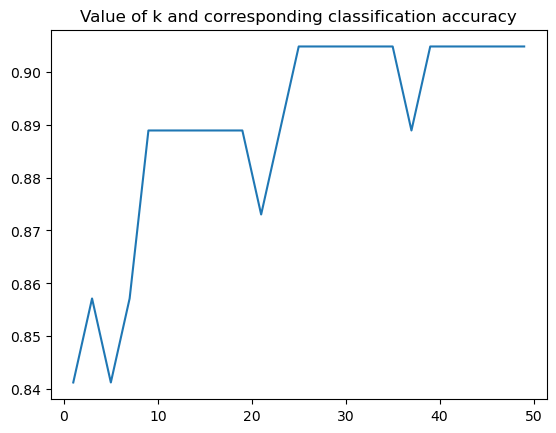

In [14]:
# Loop over a range of k values from 1 to 50 in steps of 2 to find the best k for the classifier
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)  # Define the classifier with current k
    classifier.fit(X_train, y_train)  # Train the classifier
    prediction = classifier.predict(X_test)  # Make predictions on the test set
    # Calculate accuracy and print it
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test)
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])  # Store the results (k and accuracy)

# Convert results list to a DataFrame for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

# Plot the relationship between k and accuracy
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()